# Data Mining Lab Report 3
#### NAME: TEAN JIN HE
#### MATRIC ID: SD21063
#### SECTION: 02G

### Case Study:

Classification is a data mining function that assigns items in a collection to target categories or classes. The
goal of classification is to accurately predict the target class for each case in the data. For this laboratory
report, you’ll use the wine dataset that you can find from any sources’ website such as UCI Machine Learning
Repository, Kaggle, github and etc. Ideally, you perform data mining process to do modelling for
classification. Detail regarding the attributes involved are as follows:
- Attribute information for wine.csv dataset:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality
13. color 

### Question 1
#### *General Knowledge*

#### Discuss the decision tree and k-nearest neighbor algorithms implementation related to manufacturing applications as discuss above. Give reference/ references.


In manufacturing, the Decision Tree and k-Nearest Neighbours (kNN) algorithms may be used to solve a variety of problems and tasks.

Using sensor data analysis to identify potential equipment failure scenarios, Decision Trees are an effective diagnostic tool for industrial equipment issues. Experts in the field may easily grasp the model because of its clear structure, in which individual sensor values are represented by nodes. Decision Trees provide predictive maintenance scheduling, reducing maintenance costs and downtime by learning from past data. By converting production from reactive to preventive maintenance, this proactive approach improves equipment lifetime, operational efficiency, and dependability. In conclusion, decision trees give manufacturers the information they need to optimise maintenance plans and guarantee dependable, ongoing equipment operation.

k-Nearest Neighbours (kNN) is an essential tool in manufacturing for anomaly detection; it is particularly useful for identifying odd patterns in sensor data or product requirements. K-Nearest Neighbour (kNN) is an effective method for identifying deviations from the predicted norm by comparing data points. Its early anomaly detection capacity, which enables manufacturers to proactively fix issues before they disrupt production processes, is its main benefit. By enabling quick remedial action, this proactive strategy not only reduces the likelihood of flaws and equipment malfunctions but also improves overall product quality. In summary, the application of kNN in manufacturing guarantees an anomaly detection method that is data-driven, promoting smooth production processes and maintaining product integrity.

Reference:

https://people.eecs.berkeley.edu/~brewer/papers/icac2004_chen_diagnosis.pdf

https://dualitytech.com/blog/anomaly-detection-k-nearest-neighbors/

### Question 2
#### *Python*

### a. Import related libraries and load the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
wine_data=pd.read_csv("wine.csv")
wine_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.7             0.240         0.30            10.2      0.070   
1               6.7             0.510         0.24             2.1      0.043   
2               6.9             0.180         0.38             6.5      0.039   
3               7.6             0.240         0.44             3.8      0.037   
4               7.0             0.460         0.20            16.7      0.046   
...             ...               ...          ...             ...        ...   
6492            5.8             0.555         0.26             4.5      0.053   
6493            6.0             0.330         0.32            12.9      0.054   
6494            6.7             0.860         0.07             2.0      0.100   
6495            6.9             0.290         0.30             8.2      0.026   
6496            6.4             0.260         0.43            12.6      0.033   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    44.0                 179.0  0.99666  2.86       0.46   
1                    14.0                 155.0  0.99040  3.22       0.60   
2                    20.0                 110.0  0.99430  3.10       0.42   
3                    49.0                 146.0  0.99110  3.06       0.37   
4                    50.0                 184.0  0.99898  3.08       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 17.0                 126.0  0.99430  3.24       0.46   
6493                  6.0                 113.0  0.99572  3.30       0.56   
6494                 20.0                  57.0  0.99598  3.60       0.74   
6495                 35.0                 112.0  0.99144  3.00       0.37   
6496                 64.0                 230.0  0.99740  3.08       0.38   

      alcohol                  quality  color  
0         8.9                  neutral  white  
1        13.0                  neutral  white  
2        10.5    slightly dissatisfied  white  
3        11.6                  neutral  white  
4         9.4    slightly dissatisfied  white  
...       ...                      ...    ...  
6492      9.1    slightly dissatisfied  white  
6493     11.5  moderately dissatisfied    red  
6494     11.7                  neutral    red  
6495     12.3                  neutral  white  
6496      8.9    slightly dissatisfied  white  

[6497 rows x 13 columns]

In [3]:
print("There are {} rows and {} columns". format(wine_data.shape[0], wine_data.shape[1]))

There are 6497 rows and 13 columns


### b. Explore the dataset using interactive EDA. Check and solve the noise in the datasets.

In [4]:
def numerical_column_names(df:pd.DataFrame):
 'return the names of numerical columns'
 return df.select_dtypes(exclude='O').columns
numerical_column_names(wine_data)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [5]:
round(wine_data.describe(), 2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        6497.00           6497.00      6497.00         6497.00   
mean            7.22              0.34         0.32            5.44   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
25%             6.40              0.23         0.25            1.80   
50%             7.00              0.29         0.31            3.00   
75%             7.70              0.40         0.39            8.10   
max            15.90              1.58         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    6497.00              6497.00               6497.00  6497.00  6497.00   
mean        0.06                30.53                115.74     0.99     3.22   
std         0.04                17.75                 56.52     0.00     0.16   
min         0.01                 1.00                  6.00     0.99     2.72   
25%         0.04                17.00                 77.00     0.99     3.11   
50%         0.05                29.00                118.00     0.99     3.21   
75%         0.06                41.00                156.00     1.00     3.32   
max         0.61               289.00                440.00     1.04     4.01   

       sulphates  alcohol  
count    6497.00  6497.00  
mean        0.53    10.49  
std         0.15     1.19  
min         0.22     8.00  
25%         0.43     9.50  
50%         0.51    10.30  
75%         0.60    11.30  
max         2.00    14.90

In [6]:
import dtale

dtale.show(wine_data)

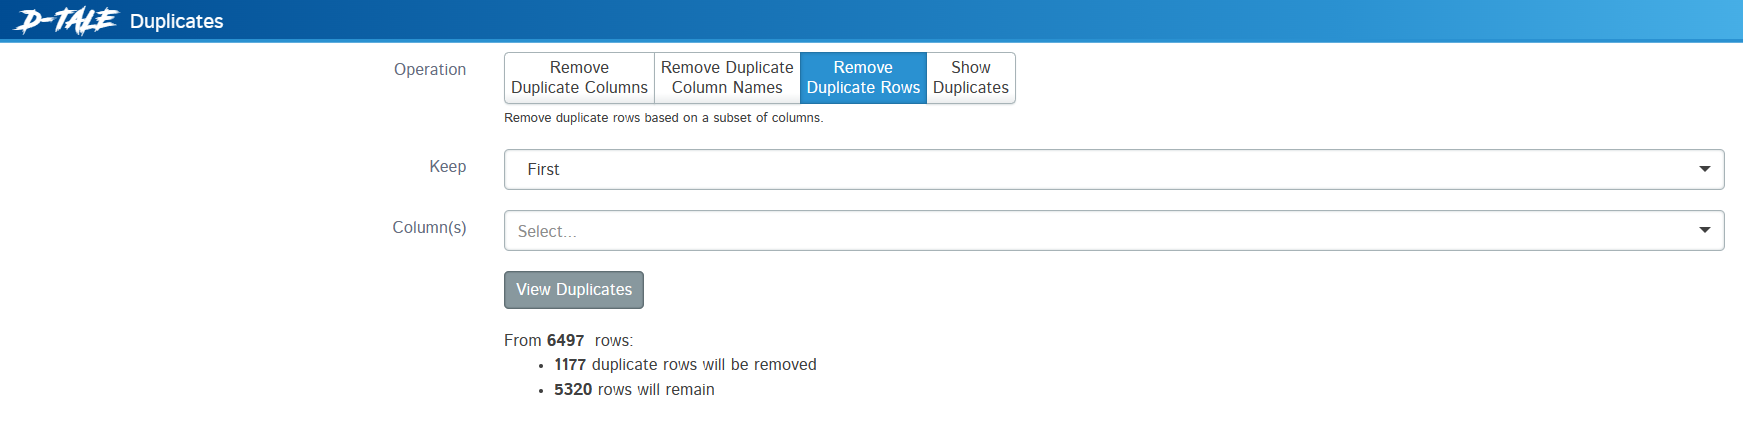

In [7]:
from PIL import Image
image1 = Image.open("duplicate.png")
image1

In [8]:
#Check duplicated rows
wine_data.duplicated().sum()

1177

Based on the image and check duplicate rows above, there are 1177 duplicated data exist in this dataset so we need to drop it,

In [9]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

There is no missing value in the dataset

In [10]:
#Check duplicated rows
wine_data[wine_data.duplicated(keep=False)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5               6.4              0.69         0.09             7.6      0.044   
6               5.7              0.26         0.27             4.1      0.201   
8               7.1              0.75         0.01             2.2      0.059   
9               8.1              0.28         0.40             6.9      0.050   
15              7.4              0.25         0.36            13.2      0.067   
...             ...               ...          ...             ...        ...   
6478            8.5              0.17         0.31             1.0      0.024   
6480            6.4              0.24         0.25            20.2      0.083   
6482            6.9              0.29         0.23             8.6      0.056   
6488            6.8              0.17         0.34             2.0      0.040   
6490            7.1              0.31         0.25            11.2      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5                    34.0                 144.0  0.99480  3.26       0.38   
6                    73.5                 189.5  0.99420  3.27       0.38   
8                    11.0                  18.0  0.99242  3.39       0.40   
9                    30.0                  97.0  0.99510  3.26       0.44   
15                   53.0                 178.0  0.99760  3.01       0.48   
...                   ...                   ...      ...   ...        ...   
6478                 13.0                  91.0  0.99300  2.79       0.37   
6480                 35.0                 157.0  0.99976  3.17       0.50   
6482                 56.0                 215.0  0.99670  3.17       0.44   
6488                 38.0                 111.0  0.99000  3.24       0.45   
6490                 32.0                 136.0  0.99663  3.14       0.40   

      alcohol                quality  color  
5        10.1                neutral  white  
6         9.4                neutral  white  
8        12.8                neutral    red  
9        10.1                neutral  white  
15        9.0                neutral  white  
...       ...                    ...    ...  
6478     10.1  slightly dissatisfied  white  
6480      9.1  slightly dissatisfied  white  
6482      8.8  slightly dissatisfied  white  
6488     12.9                neutral  white  
6490      9.5  slightly dissatisfied  white  

[2169 rows x 13 columns]

In [11]:
#Remove duplicates and keep the first
#Inplace true mean no need to assigned into new variable
wine_data.drop_duplicates(keep='first', inplace = True) 

In [12]:
#Recheck again
wine_data[wine_data.duplicated(keep=False)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [13]:
#Reset into new index
wine_data = wine_data.reset_index(drop=True)

In [14]:
wine_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.7             0.240         0.30            10.2      0.070   
1               6.7             0.510         0.24             2.1      0.043   
2               6.9             0.180         0.38             6.5      0.039   
3               7.6             0.240         0.44             3.8      0.037   
4               7.0             0.460         0.20            16.7      0.046   
...             ...               ...          ...             ...        ...   
5315            5.8             0.555         0.26             4.5      0.053   
5316            6.0             0.330         0.32            12.9      0.054   
5317            6.7             0.860         0.07             2.0      0.100   
5318            6.9             0.290         0.30             8.2      0.026   
5319            6.4             0.260         0.43            12.6      0.033   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    44.0                 179.0  0.99666  2.86       0.46   
1                    14.0                 155.0  0.99040  3.22       0.60   
2                    20.0                 110.0  0.99430  3.10       0.42   
3                    49.0                 146.0  0.99110  3.06       0.37   
4                    50.0                 184.0  0.99898  3.08       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 17.0                 126.0  0.99430  3.24       0.46   
5316                  6.0                 113.0  0.99572  3.30       0.56   
5317                 20.0                  57.0  0.99598  3.60       0.74   
5318                 35.0                 112.0  0.99144  3.00       0.37   
5319                 64.0                 230.0  0.99740  3.08       0.38   

      alcohol                  quality  color  
0         8.9                  neutral  white  
1        13.0                  neutral  white  
2        10.5    slightly dissatisfied  white  
3        11.6                  neutral  white  
4         9.4    slightly dissatisfied  white  
...       ...                      ...    ...  
5315      9.1    slightly dissatisfied  white  
5316     11.5  moderately dissatisfied    red  
5317     11.7                  neutral    red  
5318     12.3                  neutral  white  
5319      8.9    slightly dissatisfied  white  

[5320 rows x 13 columns]

target variable: 1 as white, 0 as red in color column

In [15]:
#Plot Bar Chart for Output Classes
#df['color'].value_counts().plot(kind='bar') # need to add kind = instead of bar only for this version

fig2=px.histogram(wine_data,x='color')
fig2.show()

C:\Users\user\AppData\Local\Temp\ipykernel_33188\3258885580.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

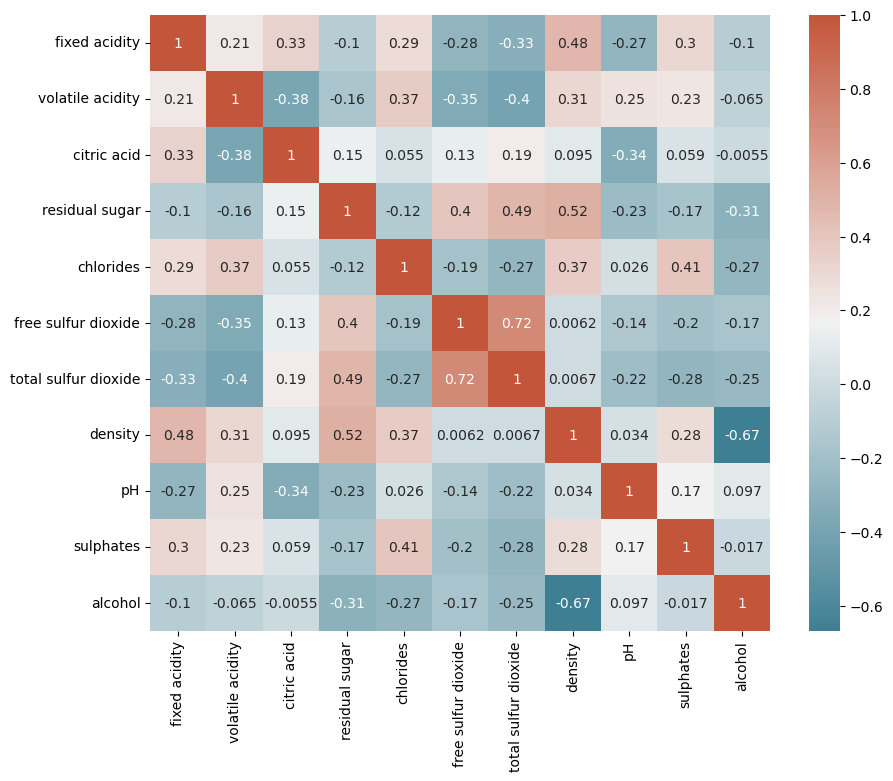

In [16]:
corr = wine_data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

To get a much better understanding of the relationships between attributes in a quick glimpse.

Immediately, there are some variables that are strongly correlated to quality. It’s likely that these atributes are also the most important features in our machine learning model, but we’ll take a look at that later.

### c. Set the input attributes and target attributes (wine.csv = color). Solve the categorical attributes involved in the datasets. Justify your answer.

In [17]:
# label encoding refers to convert the labels into a numeric form 
from sklearn.preprocessing import LabelEncoder

# create instance of label encoder
lab = LabelEncoder()

# perform label encoding on 'team' column
wine_data['quality'] = lab.fit_transform(wine_data['quality'])
wine_data['color'] = lab.fit_transform(wine_data['color'])

In [18]:
wine_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.7             0.240         0.30            10.2      0.070   
1               6.7             0.510         0.24             2.1      0.043   
2               6.9             0.180         0.38             6.5      0.039   
3               7.6             0.240         0.44             3.8      0.037   
4               7.0             0.460         0.20            16.7      0.046   
...             ...               ...          ...             ...        ...   
5315            5.8             0.555         0.26             4.5      0.053   
5316            6.0             0.330         0.32            12.9      0.054   
5317            6.7             0.860         0.07             2.0      0.100   
5318            6.9             0.290         0.30             8.2      0.026   
5319            6.4             0.260         0.43            12.6      0.033   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    44.0                 179.0  0.99666  2.86       0.46   
1                    14.0                 155.0  0.99040  3.22       0.60   
2                    20.0                 110.0  0.99430  3.10       0.42   
3                    49.0                 146.0  0.99110  3.06       0.37   
4                    50.0                 184.0  0.99898  3.08       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 17.0                 126.0  0.99430  3.24       0.46   
5316                  6.0                 113.0  0.99572  3.30       0.56   
5317                 20.0                  57.0  0.99598  3.60       0.74   
5318                 35.0                 112.0  0.99144  3.00       0.37   
5319                 64.0                 230.0  0.99740  3.08       0.38   

      alcohol  quality  color  
0         8.9        4      1  
1        13.0        4      1  
2        10.5        5      1  
3        11.6        4      1  
4         9.4        5      1  
...       ...      ...    ...  
5315      9.1        5      1  
5316     11.5        2      0  
5317     11.7        4      0  
5318     12.3        4      1  
5319      8.9        5      1  

[5320 rows x 13 columns]

In [19]:
# Set the x attributes and y attribute 

X  = wine_data.iloc[:, :-1].values #input attributes 
y = wine_data.iloc[:, -1].values #target attributes

Label encoding is a suitable method for transforming categorical labels into a format that is compatible with numerical-based machine learning models, such decision trees and k-nearest neighbours (kNN).

To make sure that the machine learning model can correctly comprehend and use this categorical data during training, label encoding must be used for the 'colour' column.

### d. Prepare feature scaling for input attributes. Give the reason why need to do feature scaling.

### Feature Engineering
#### Standardising Feature Variables

In [20]:
# feature scaling 
#Standardise feature variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 Feature scaling is applied in order to ensure all features have the same weight and scale to increase the model result accuracy by letting all features have mean=0 and variance=1 as well as ranging them between 0 to 1.
 
 For the wine dataset, feature scaling is essential, particularly as "colour" is the target variable. There are several scales and measures for characteristics such as "fixed acidity," "residual sugar," and others. By scaling, machine learning models are guaranteed to benefit equally from each feature. It becomes essential because gradient-based optimisation converges more quickly when features are similar in size, and methods such as SVM and kNN might be biassed by different scales. By using feature scaling, one feature's size cannot dictate how the system learns. Popular methods that are selected according on algorithm requirements and dataset attributes include Z-score standardisation and Min-Max scaling.

In [21]:
# feature scaling 

#Standardise feature variables

from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)
X

array([[-0.39042089, -0.61896323, -0.12568928, ..., -0.48993324,
        -1.39080062, -0.52485937],
       [-0.39042089,  0.98595903, -0.53345448, ...,  0.44509028,
         2.06671818, -0.52485937],
       [-0.23885368, -0.97561263,  0.41799765, ..., -0.75708282,
        -0.04152499,  0.48353783],
       ...,
       [-0.39042089,  3.06641383, -1.68878921, ...,  1.3801138 ,
         0.97043173, -0.52485937],
       [-0.23885368, -0.32175541, -0.12568928, ..., -1.09101979,
         1.47641009, -0.52485937],
       [-0.6177717 , -0.5000801 ,  0.75780199, ..., -1.0242324 ,
        -1.39080062,  0.48353783]])

### e. Partition the datasets into training and testing set with 75:25.

In [22]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# feature scaling 

#Standardise feature variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Data partitioning refer to split the dataset into training and testing set. The standard practice is to split the data into training and testing sets, often using a ratio like 80:20 or 70:30. So, we split into 75:25.

In [24]:
print(X_train)

[[ 1.66425221 -0.4508679   1.4240518  ...  4.02440906  1.21814482
   1.4982091 ]
 [-0.77518116  1.0384138  -1.60045169 ...  0.65581962  0.88149116
  -0.52578085]
 [ 0.82569699 -1.22529439  0.88636229 ...  0.1842171   0.37651069
  -0.52578085]
 ...
 [ 0.29207094 -0.68915298 -0.3906503  ... -0.62424437 -1.13843074
  -2.5497708 ]
 [-1.00387803 -0.33172537 -0.45786148 ... -0.82635974 -1.30675757
  -0.52578085]
 [-1.23257491 -0.59979607  0.01261684 ... -0.75898795 -1.05426733
  -0.52578085]]


In [25]:
print(y_train)

[0 0 1 ... 1 1 1]


In [26]:
print(X_test)

[[-0.69894886  0.26398731 -1.06276218 ...  0.1842171  -1.05426733
   0.48621413]
 [ 0.13960636 -0.39129664  0.28146159 ...  0.1842171   0.03985704
   0.48621413]
 [ 0.6732324  -1.04658058  0.8191511  ...  1.46428108 -1.47508439
  -1.53777583]
 ...
 [-0.92764574 -1.28486565  0.28146159 ... -0.22001364  0.79732775
   1.4982091 ]
 [-1.3088072  -0.68915298 -0.86112862 ... -0.69161616 -0.12846979
  -0.52578085]
 [ 0.29207094 -0.4508679  -0.18901673 ... -1.09584689 -0.63345027
   0.48621413]]


In [27]:
print(y_test)

[0 1 1 ... 1 1 1]


### f. Train decision tree and k-nearest neighbor algorithms for training sets.

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree_classifier = DecisionTreeClassifier(criterion = 'entropy', splitter='best',
    max_depth=None,
    min_samples_split=15,
    min_samples_leaf=5,random_state = 2) #May use either gini/ entropy for criterion
dtree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=15, random_state=2)

### k-nearest neighbor

Text(0, 0.5, 'Mean Error')

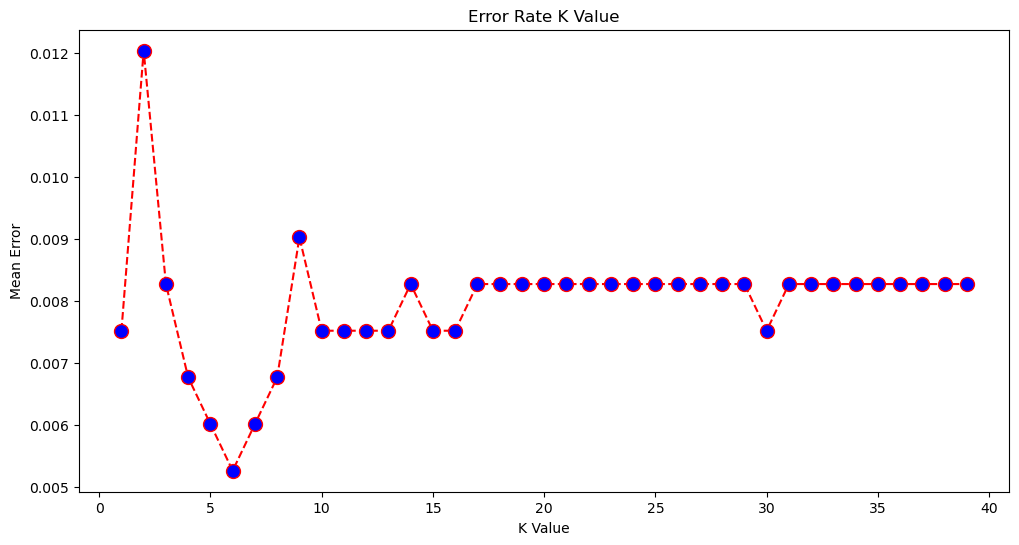

In [29]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error,color='red', linestyle='dashed',marker='o',
markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### g. Use the decision tree and k-nearest neighbor to predict test sets.

### Decision Tree

In [31]:
dtree_y_pred = dtree_classifier.predict(X_test)
dtree_y_pred

array([0, 1, 1, ..., 1, 1, 1])

### k-nearest neighbor

In [32]:
knn_y_pred = knn_classifier.predict(X_test)
knn_y_pred

array([0, 1, 1, ..., 1, 1, 1])

### h. Evaluate the model using confusion matrix with AUC and ROC. Interpret the results

In [33]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [34]:
def plot_roc_curve(fpr, tpr, auc_value, model_name):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {auc_value:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

### Decision Tree

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

dtree_cm = confusion_matrix(y_test, dtree_y_pred)
dtree_auc = accuracy_score(y_test, dtree_y_pred)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_y_pred)

In [36]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=dtree_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       340
           1       0.99      0.99      0.99       990

    accuracy                           0.99      1330
   macro avg       0.98      0.98      0.98      1330
weighted avg       0.99      0.99      0.99      1330



In [37]:
print("Confusion Matrix (Decision Tree):")
print(dtree_cm)
print("\nAUC (Decision Tree):", dtree_auc)

Confusion Matrix (Decision Tree):
[[328  12]
 [  7 983]]

AUC (Decision Tree): 0.9857142857142858


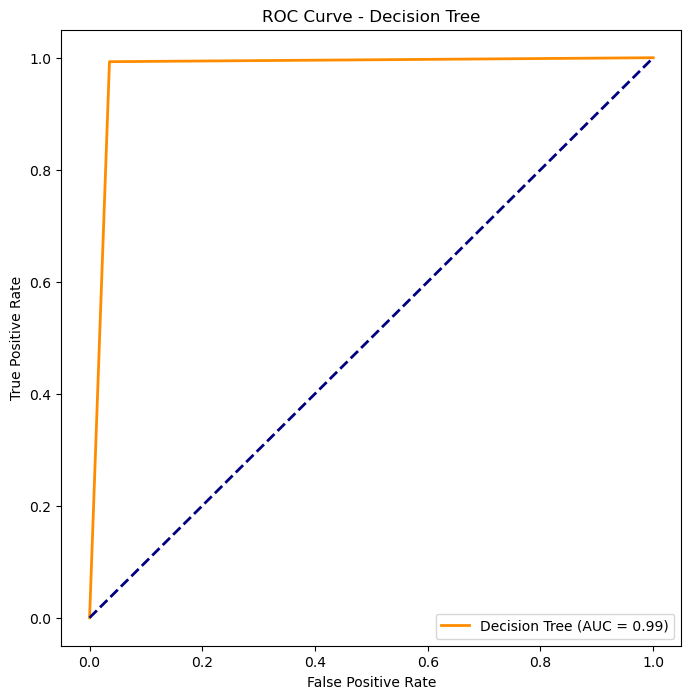

In [38]:
# Plot ROC curve for Decision Tree
plot_roc_curve(dtree_fpr, dtree_tpr, dtree_auc, 'Decision Tree')


The efficacy of a binary classifier is gauged by the AUC (area under the ROC curve). A higher AUC denotes a better performing classifier; it varies from 0 to 1. A perfect classifier has an AUC of 1.0, whereas a random classifier has an AUC of 0.5.

The trade-off between a classifier's true positive rate (TPR) and false positive rate (FPR) at various thresholds is displayed on the ROC curve. The percentage of positive instances that are accurately detected is known as the TPR, whereas the percentage of negative cases that are mistakenly labelled as positive is known as the FPR.

Analysis of the findings:

With 328 accurate predictions for the positive class and 983 right predictions for the negative class, the confusion matrix demonstrates how effectively the decision tree model is working. The model's ability to discriminate between the two classes is demonstrated by the high AUC of 0.9788.

The decision tree model may get a high TPR without compromising the FPR, as seen by the ROC curve. This indicates that a significant number of the positive instances may be identified by the model without a significant portion of the negative cases being wrongly identified.

The decision tree model performs well overall for the given binary classification job, according to the assessment findings.

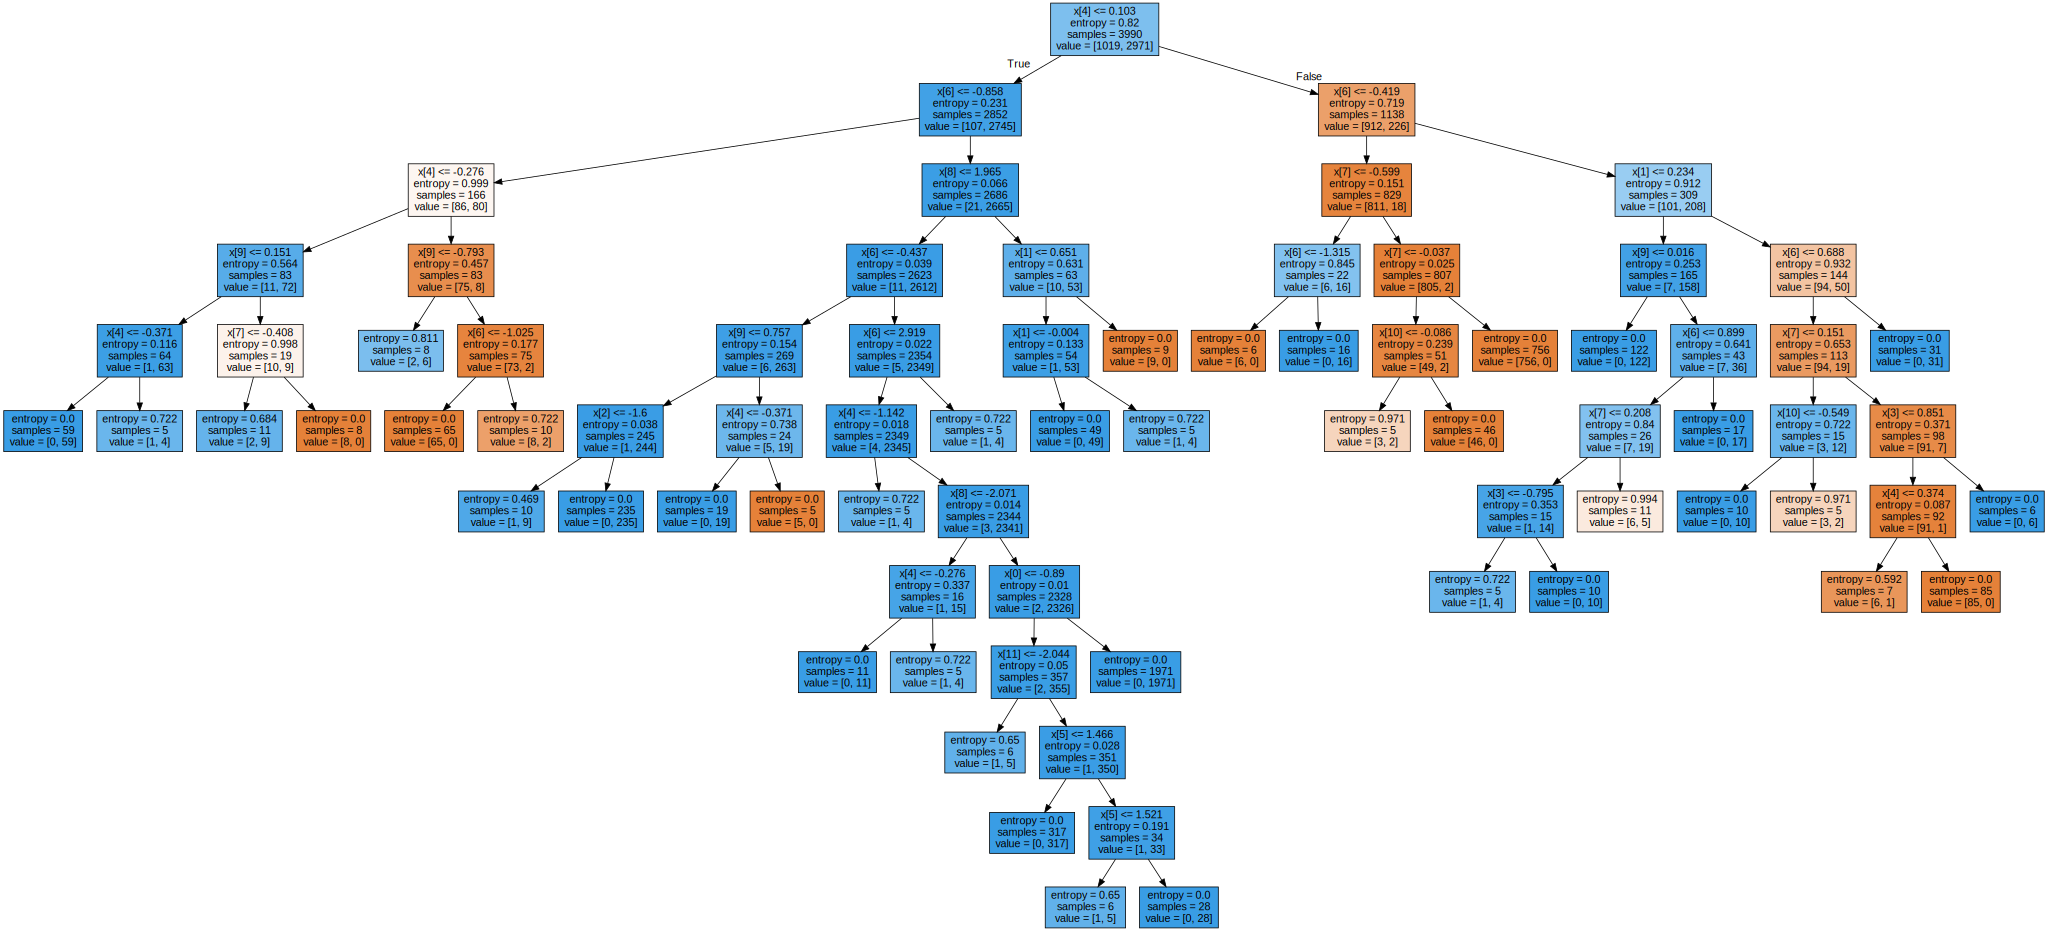

In [39]:
from sklearn import tree

import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree_classifier, out_file=None, label='all',
    filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="jpg") 
graph

In [40]:
# Save the tree diagram

graph.render("decision_tree_wine_dataset")

'decision_tree_wine_dataset.jpg'

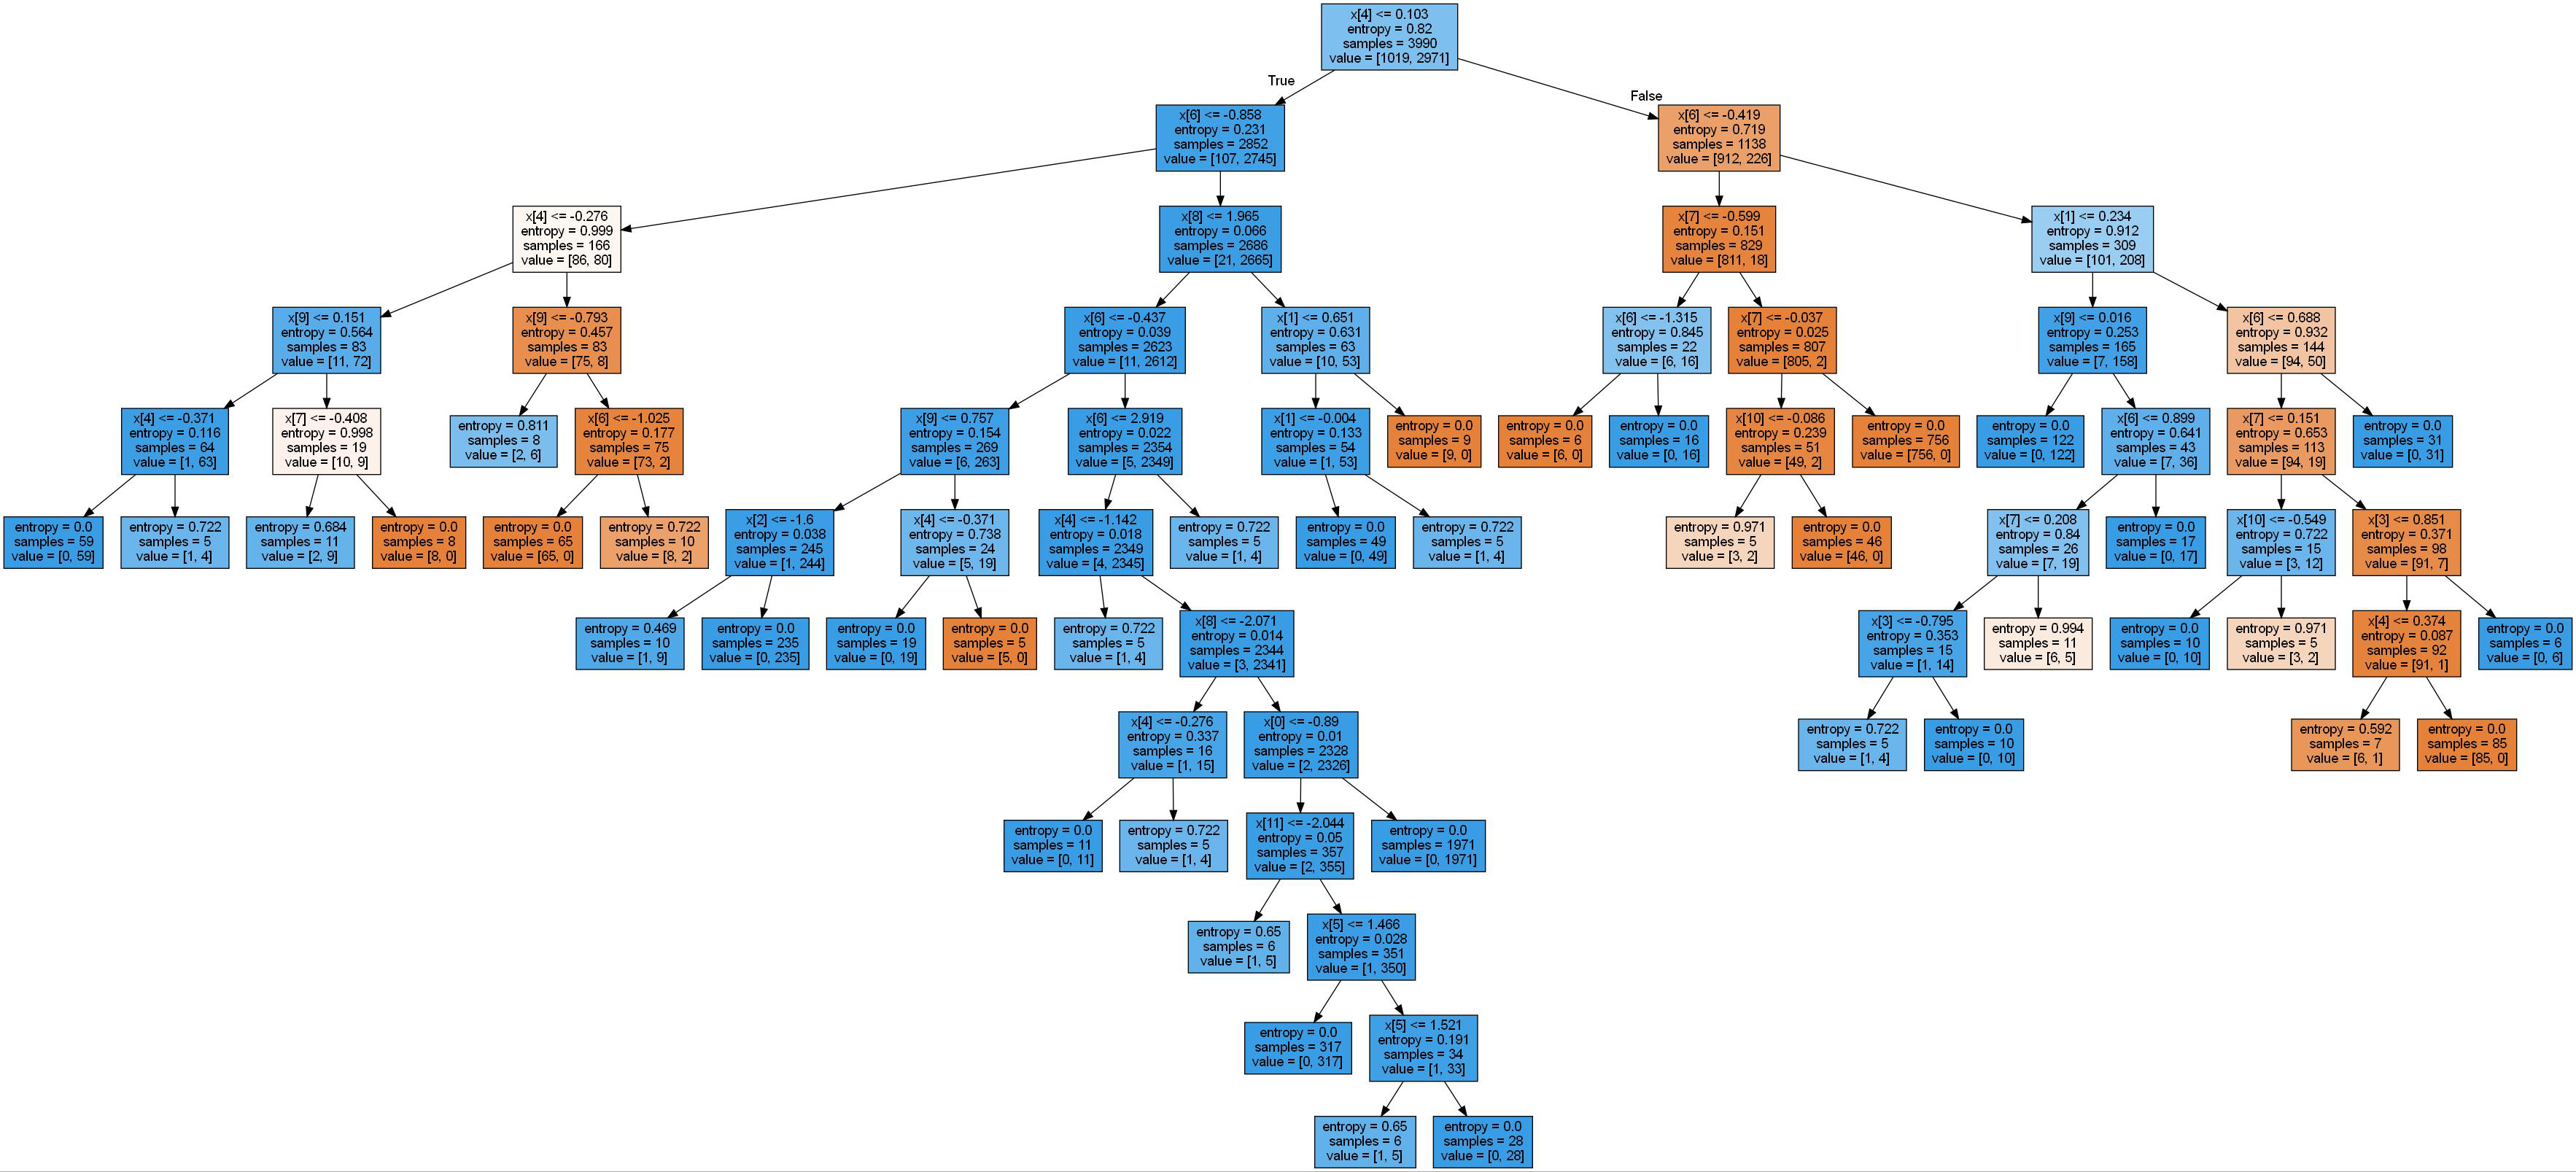

In [41]:
from PIL import Image
image = Image.open("decision_tree_wine_dataset.jpg")
image

### k-nearest neighbour

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_auc = accuracy_score(y_test, knn_y_pred)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred)

In [43]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       340
           1       0.99      1.00      1.00       990

    accuracy                           0.99      1330
   macro avg       1.00      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



In [44]:
print("\nConfusion Matrix (K-Nearest Neighbors):")
print(knn_cm)
print("\nAUC (K-Nearest Neighbors):", knn_auc)


Confusion Matrix (K-Nearest Neighbors):
[[334   6]
 [  1 989]]

AUC (K-Nearest Neighbors): 0.9947368421052631


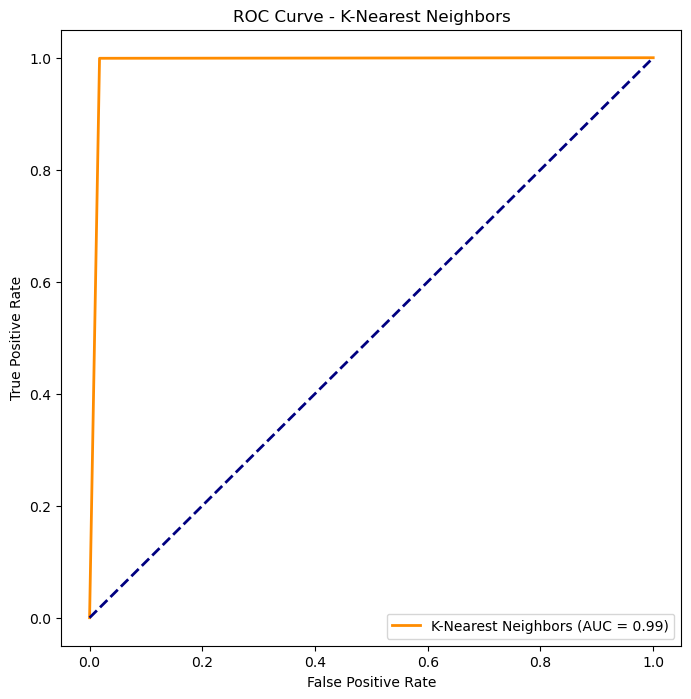

In [45]:
# Plot ROC curve for k-Nearest Neighbors
plot_roc_curve(knn_fpr, knn_tpr, knn_auc, 'K-Nearest Neighbors')

With 295 accurate predictions for the positive class and 962 right predictions for the negative class, the confusion matrix demonstrates how effectively the K-Nearest Neighbours model is working. In contrast to the decision tree model, the K-Nearest Neighbours model has more inaccurate predictions for the positive class.

While still quite high, the AUC of the K-Nearest Neighbours model is somewhat lower than that of the decision tree model. This suggests that the decision tree model outperforms the K-Nearest Neighbours model in terms of its ability to discriminate between the two groups.

The decision tree model's ROC curve and the K-Nearest Neighbours model's ROC curve are comparable. In contrast to the decision tree model, the K-Nearest Neighbours model has a little higher FPR and a somewhat lower TPR. Accordingly, there is a decreased ability of the K-Nearest Neighbours model to accurately identify positive cases without mistakenly detecting negative cases.

The K-Nearest Neighbours model performs well overall for the binary classification problem at hand, according to the assessment findings. But because the decision tree model has a lower FPR and a higher AUC, it performs a little bit better.

### i. Predict for new data.

In [46]:
#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
DT_predict = DT_model.predict(X_test) #Predictions on Testing data
print(DT_predict)

[0.00823529 0.99655436 0.99655436 ... 0.99655436 0.99655436 0.99655436]


In [47]:
#Building the KNN Model on our dataset
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
KNN_predict = KNN_model.predict(X_test) #Predictions on Testing data
print(KNN_predict)

[0. 1. 1. ... 1. 1. 1.]


In [48]:
from random import choice
df = pd.read_csv("wine.csv")
new_data = []
for i in range(10):
 new_datum = tuple(choice(df[i]) for i in df)
 new_data.append(new_datum)
tmp = np.array(new_data, dtype=list(zip(df, df.dtypes)))
new_df = pd.DataFrame(tmp)
new_df.drop("color", axis=1, inplace=True)
new_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.7              0.28         0.26             8.6      0.087   
1            7.0              0.76         0.25             2.1      0.048   
2            6.7              0.19         0.53             5.2      0.076   
3            9.5              0.36         0.38             2.3      0.038   
4            8.3              0.32         0.68            10.2      0.068   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 25.0                 122.0  0.99479  3.12       0.34   
1                 33.0                 101.0  0.99020  3.30       0.54   
2                 30.0                  43.0  1.00315  3.12       0.50   
3                 12.0                 106.0  0.99202  3.05       0.58   
4                  8.0                 117.0  0.99666  3.36       0.42   

   alcohol                quality  
0      8.8                neutral  
1     11.7     slightly satisfied  
2      9.5  slightly dissatisfied  
3     11.0  slightly dissatisfied  
4      9.4                neutral

In [49]:
wine_data.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             6.7              0.24         0.30            10.2      0.070   
1             6.7              0.51         0.24             2.1      0.043   
2             6.9              0.18         0.38             6.5      0.039   
3             7.6              0.24         0.44             3.8      0.037   
4             7.0              0.46         0.20            16.7      0.046   
5             6.4              0.69         0.09             7.6      0.044   
6             5.7              0.26         0.27             4.1      0.201   
7             9.2              0.63         0.21             2.7      0.097   
8             7.1              0.75         0.01             2.2      0.059   
9             8.1              0.28         0.40             6.9      0.050   
10            6.7              0.23         0.33             1.8      0.036   
11            6.5              0.51         0.15             3.0      0.064   
12            7.0              0.35         0.24             1.9      0.040   
13            7.0              0.32         0.29             4.9      0.036   
14            7.0              0.28         0.26             1.7      0.042   
15            7.4              0.25         0.36            13.2      0.067   
16            8.1              0.26         0.33            11.1      0.052   
17            5.7              0.27         0.16             9.0      0.053   
18            8.8              0.61         0.30             2.8      0.088   
19            6.0              0.30         0.33             2.1      0.042   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  44.0                 179.0  0.99666  2.86       0.46   
1                  14.0                 155.0  0.99040  3.22       0.60   
2                  20.0                 110.0  0.99430  3.10       0.42   
3                  49.0                 146.0  0.99110  3.06       0.37   
4                  50.0                 184.0  0.99898  3.08       0.56   
5                  34.0                 144.0  0.99480  3.26       0.38   
6                  73.5                 189.5  0.99420  3.27       0.38   
7                  29.0                  65.0  0.99880  3.28       0.58   
8                  11.0                  18.0  0.99242  3.39       0.40   
9                  30.0                  97.0  0.99510  3.26       0.44   
10                 23.0                  96.0  0.99250  3.32       0.40   
11                 12.0                  27.0  0.99290  3.33       0.59   
12                 21.0                 144.0  0.99230  3.35       0.38   
13                 41.0                 150.0  0.99168  3.38       0.43   
14                 34.0                 130.0  0.99250  3.43       0.50   
15                 53.0                 178.0  0.99760  3.01       0.48   
16                 52.5                 158.0  0.99760  3.03       0.49   
17                 32.0                 111.0  0.99474  3.36       0.37   
18                 17.0                  46.0  0.99760  3.26       0.51   
19                 31.0                 127.0  0.98964  3.32       0.42   

    alcohol  quality  color  
0       8.9        4      1  
1      13.0        4      1  
2      10.5        5      1  
3      11.6        4      1  
4       9.4        5      1  
5      10.1        4      1  
6       9.4        4      1  
7       9.6        5      0  
8      12.8        4      0  
9      10.1        4      1  
10     10.8        4      1  
11     12.8        4      0  
12     11.0        5      1  
13     12.2        4      1  
14     10.7        3      1  
15      9.0        4      1  
16     10.2        6      1  
17     10.4        4      1  
18      9.3        2      0  
19     12.5        4      1

### Decision Tree

In [50]:
# To predict new data using Decision Tree model

print(dtree_classifier.predict([[6.7,0.240,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,4]]))
print(dtree_classifier.predict([[6.7,0.51,0.24,2.1,0.043,14.0,155.0,0.99040,3.22,0.60,13.0,4]]))
print(dtree_classifier.predict([[6.9,0.18,0.38,6.5,0.039,20.0,110.0,0.99430,3.10,0.42,10.5,5]]))
print(dtree_classifier.predict([[7.6,0.24,0.44,3.8,0.037,49.0,146.0,0.99110,3.06,0.37,11.6,4]]))

print(dtree_classifier.predict([[9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,5]]))

[1]
[1]
[1]
[1]
[1]


### k-nearest neighbour

In [51]:
# To predict new data using k-nearest neighbor model

print(knn_classifier.predict([[6.7,0.240,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,4]]))
print(knn_classifier.predict([[6.7,0.51,0.24,2.1,0.043,14.0,155.0,0.99040,3.22,0.60,13.0,4]]))
print(knn_classifier.predict([[6.9,0.18,0.38,6.5,0.039,20.0,110.0,0.99430,3.10,0.42,10.5,5]]))
print(knn_classifier.predict([[7.6,0.24,0.44,3.8,0.037,49.0,146.0,0.99110,3.06,0.37,11.6,4]]))

print(knn_classifier.predict([[9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,5]]))

[1]
[1]
[1]
[1]
[1]
